### **REGRESSION MODELS**
by J. Daniel Velez

Here different regression models are tested

In [1]:
from f_filter_process import get_file, call_file, export_dataframe
from regression_models import*
import pandas as pd
import geopandas as gpd

In [2]:
# Function to import files
River_dict = call_file() 

2024-11-22 11:25:03.056 python[8639:170670] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-22 11:25:03.450 python[8639:170670] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


##### Linear Regression
Args for the 'l_regression' function:
 * river (dict): Dictionary containing node data with 'width' and 'wse' keys.
 * min_spearman (float or None): Minimum Spearman correlation value to include a node in the plot.
                                 if None, no filtering is applied (default: None).
 * min_obs (int): Minimum number of observations required to display a scatter plot for a node (default: 10).
 * show_p_value (bool): If True, displays the p-value on each scatter plot (default: True).

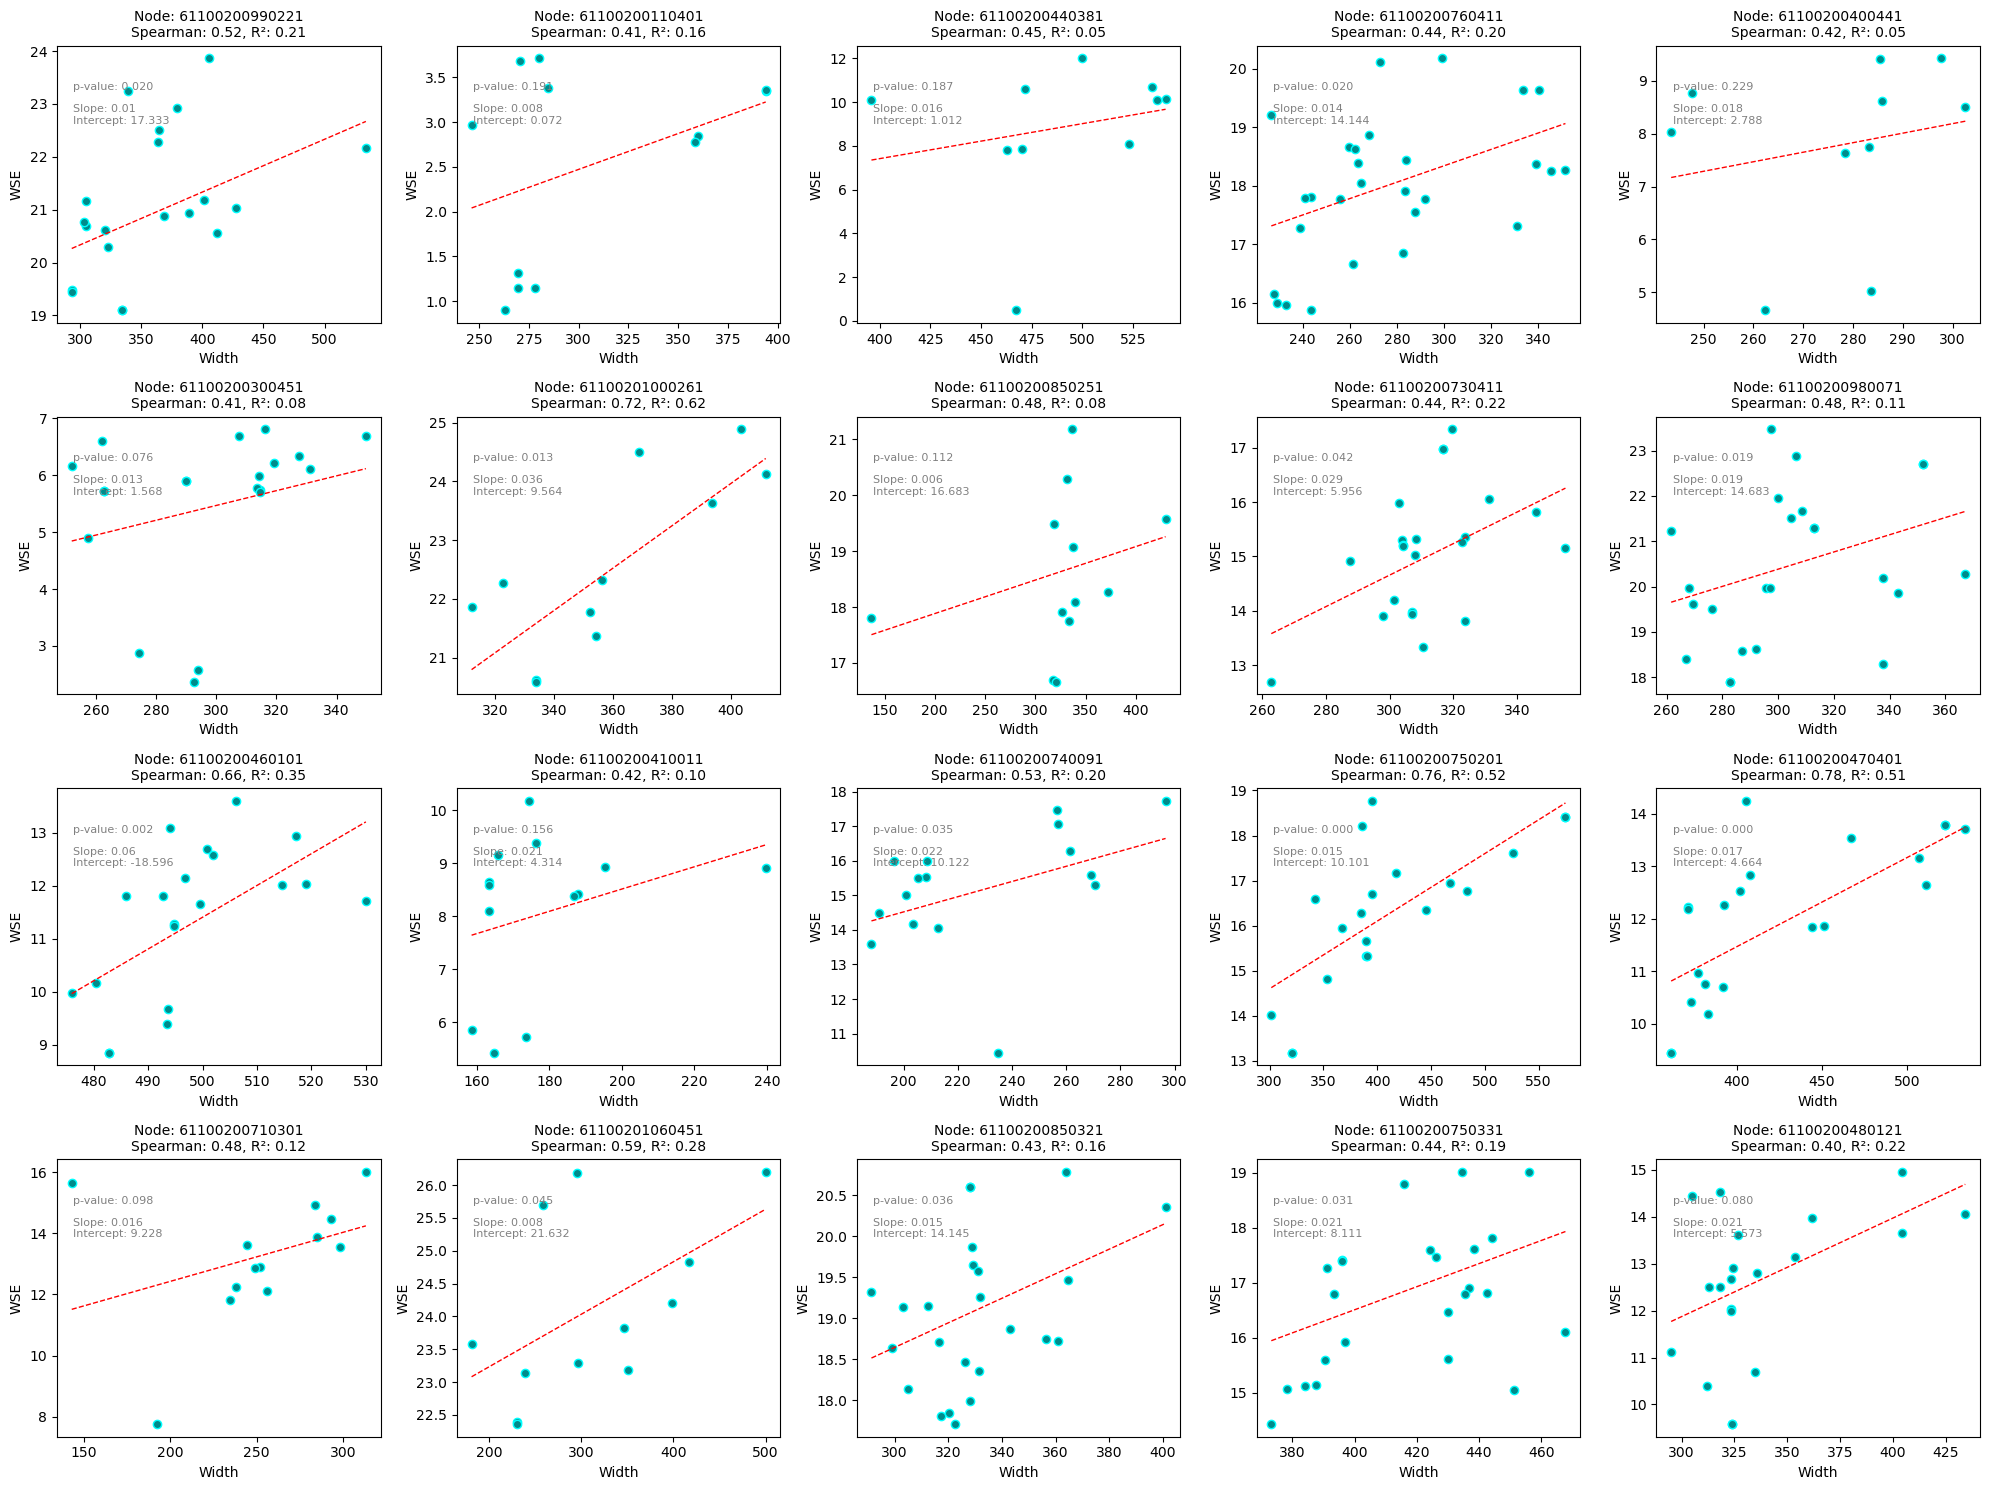

In [3]:
################## 1. Linear Regression ##################
linear_reg = l_regression(River_dict, min_spearman=0.4, min_obs=10, show_p_value=True)

In [4]:
linear_reg.rename(columns={'Node': 'node_id','Spearman': 'spearman_corr'}, inplace=True)
linear_reg

,node_id,spearman_corr,p_value,R2,Slope,Intercept
0,61100200020011,0.248,0.292,0.000,0.000,1.074
1,61100200020021,-0.034,0.893,0.006,0.001,0.872
2,61100200020031,0.008,0.975,0.014,-0.003,2.285
3,61100200020041,0.170,0.474,0.063,0.004,-0.042
4,61100200020051,0.088,0.745,0.001,0.001,0.814
...,...,...,...,...,...,...
1769,61100201260151,0.600,0.067,0.548,0.004,39.657
1770,61100201260171,0.673,0.033,0.858,0.012,39.199
1771,61100201260451,0.895,0.000,0.630,0.009,42.994
1772,61100201270061,0.382,0.247,0.689,0.004,45.769


In [6]:
export_dataframe(linear_reg,is_geodataframe=False)

DataFrame has been exported to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Atrato/csv/No_Norm/dargk_fr_030/8_bits_filter/rho_Atr_N_8030_8030≥10.csv


In [7]:
river_gpkg = call_file()

In [8]:
## Define the common column used for merging, e.g., "id" (replace "id" with your actual column name)
common_column = "node_id"
#Merge the geodataframe with the dataframe
l_regression = river_gpkg.merge(linear_reg, on=common_column).T.drop_duplicates().T # Drop duplicate columns

In [9]:
#l_regression['geometry'] = gpd.GeoSeries.from_wkt(l_regression['geometry'])
l_regression = gpd.GeoDataFrame(l_regression, geometry='geometry', crs="EPSG:4326")
# Ensure Slope and Intercept are real numbers and round them to 3 decimals
l_regression['Slope'] = pd.to_numeric(l_regression['Slope'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")
l_regression['Intercept'] = pd.to_numeric(l_regression['Intercept'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")

In [10]:
export_dataframe(l_regression,is_geodataframe=True)

GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Atrato/Shps/No_Norm/dargk_fr_030/8_bits_filter/reg_Atr_N_8030_10obsCV.gpkg


In [ ]:
l_regression

In [11]:
l_reg_filtered = l_regression[l_regression['spearman_corr_y'] >= 0.4]
l_reg_filtered

,node_id,time_str,lat,lon,river_name,wse,wse_u,width,width_u,node_dist,...,p_dist_out,spearman_corr_x,p_value_x,num_pairs,geometry,spearman_corr_y,p_value_y,R2,Slope,Intercept
1905,61100200040471,2024-08-25T08:33:03Z,7.730967,-77.13875,no_data,1.98567,0.0924,364.217415,6.803361,5.712636,...,67361.0,0.464286,0.081251,15,POINT (-77.13875 7.73097),0.464,0.081,0.131,0.012,-2.929
1906,61100200040471,2024-01-15T07:33:42Z,7.730984,-77.138822,no_data,1.41087,0.09452,347.388918,5.543585,9.814523,...,67361.0,0.464286,0.081251,15,POINT (-77.13882 7.73098),0.464,0.081,0.131,0.012,-2.929
1907,61100200040471,2023-10-17T09:16:52Z,7.730886,-77.138518,no_data,1.40262,0.09345,332.049712,4.931326,20.443439,...,67361.0,0.464286,0.081251,15,POINT (-77.13852 7.73089),0.464,0.081,0.131,0.012,-2.929
1908,61100200040471,2024-02-05T04:18:48Z,7.730892,-77.138467,no_data,0.48531,0.09458,345.368602,4.037921,19.395266,...,67361.0,0.464286,0.081251,15,POINT (-77.13847 7.73089),0.464,0.081,0.131,0.012,-2.929
1909,61100200040471,2023-11-28T02:47:03Z,7.731007,-77.138848,no_data,1.70716,0.09328,371.031096,7.530439,17.23786,...,67361.0,0.464286,0.081251,15,POINT (-77.13885 7.73101),0.464,0.081,0.131,0.012,-2.929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30496,61100201270101,2024-05-13T00:48:21Z,5.326652,-76.726798,no_data,46.80018,0.10198,111.64665,4.504253,89.989926,...,602172.0,0.890909,0.000542,10,POINT (-76.72680 5.32665),0.891,0.001,0.621,0.020,44.776
30497,61100201270101,2024-06-23T18:18:31Z,5.326663,-76.726895,no_data,47.4739,0.09541,146.828447,5.267849,100.408646,...,602172.0,0.890909,0.000542,10,POINT (-76.72690 5.32666),0.891,0.001,0.621,0.020,44.776
30498,61100201270101,2024-07-14T15:03:35Z,5.326764,-76.726799,no_data,47.11115,0.09705,121.740678,5.017838,81.76786,...,602172.0,0.890909,0.000542,10,POINT (-76.72680 5.32676),0.891,0.001,0.621,0.020,44.776
30499,61100201270101,2024-10-06T02:03:57Z,5.326702,-76.726842,no_data,47.09813,0.0964,115.959745,5.941951,87.994554,...,602172.0,0.890909,0.000542,10,POINT (-76.72684 5.32670),0.891,0.001,0.621,0.020,44.776


In [12]:
export_dataframe(l_reg_filtered,is_geodataframe=True)

GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Atrato/Shps/No_Norm/dargk_fr_030/8_bits_filter/reg_Atr_N_8030_10obsCV04.gpkg


In [14]:
l_reg_Pfiltered = l_reg_filtered[l_reg_filtered['p_value_y'] <= 0.05]
export_dataframe(l_reg_filtered,is_geodataframe=True)

GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Atrato/Shps/No_Norm/dargk_fr_030/8_bits_filter/reg_Atr_N_8030_10obsCV04_P_val.gpkg
